Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='green'><b>Полезные (и просто интересные) материалы:</b></font> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 

<font color='green'>Пример BERT с GPU:
```python
%%time
from tqdm import notebook
batch_size = 2 # для примера возьмем такой батч, где будет всего две строки датасета
embeddings = [] 
for i in notebook.tqdm(range(input_ids.shape[0] // batch_size)):
        batch = torch.LongTensor(input_ids[batch_size*i:batch_size*(i+1)]).cuda() # закидываем тензор на GPU
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()
        
        with torch.no_grad():
            model.cuda()
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на проц, чтобы в нумпай кинуть
        del batch
        del attention_mask_batch
        del batch_embeddings
        
features = np.concatenate(embeddings) 
```
Можно сделать предварительную проверку на наличие GPU.\
Например, так: ```device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")```\
Тогда вместо .cuda() нужно писать .to(device)

Если понравилась работа с текстами, то можешь посмотреть очень интересный (но очень-очень сложный) курс лекций: https://github.com/yandexdataschool/nlp_course .
</font>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Радует, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Отлично, что стоп-слова были исключены при векторизации!
* Работа получилась отличной, тебе удалось добиться достаточно хорошего качества. Поздравляю!
* Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Прошу прощения за столь длительное молчание, честно скажу, что сейчас на меня много чего свалилось и с кандачка разобраться с пайпланом и бертом не получилось. Боюсь, что меня переведут в когорту младше, если не сдам проект в ближайшее время, поэтому прошу зачесть проект как есть, но я вернусь к твоим крутым ссылкам, когда станет по легче) выводы дописала. Еще раз спасибо за мнформацию, в тренажере почти ничего не понятно было))
</div>

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Проект зачтен!
* Удачи в дальнейшем обучении и следующих работах!

<div class="alert alert-block alert-info">
<b>Совет (ревью 2): </b> 

1. Внутри кросс-валидации происзодит разбиение переданной в нее выборку на части (треин и валидация). Подробнее тут: https://codecamp.ru/blog/cross-validation-k-fold/
2. Мы хотим, чтобы при подборе параметров внутри кросс-валидации векторизатор не обучался на валидации. Для этого нам нужно его обучать каждый раз только на треине (внутри кросс-валидации). Для этого и нужен пайплайн, чтобы внутри кросс-валидации обучалась не только модель, но и векторизатор. 

Вот такой пайплайн нужно передать в кросс-валидацию:  
`pipe_lr = Pipeline([(‘vect’, CountVectorizer()),
 (‘tfidf’, TfidfTransformer()),
 (‘model’, LogisticRegression())])`
    
Тут подробнее про то, как тюнить параметры у пайплайна: https://stackoverflow.com/questions/51606341/hyper-parameter-tuning-on-pipeline-object
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.1 MB/s eta 0:00:00a 0:00:010m
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 9.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.8 MB/s eta 0:00:0000:0100:02
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 5.1 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 13.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 8.9 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.2/763.2 KB 10.9 MB/s eta 0:00:00a 0:00:01
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=e19adcd03b78b16eef3f05a587d7f0841f5791a7b702b4b8fd4a0f682e08af8b
  Stored in directory: /home/jovyan/.cache/pip/wheels/12/1c/3d/46cf06718d63a32ff798a89594b61e7f345ab6b36d909ce033
Successfully built sacremoses
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.3 MB/s eta 0:00:00a 0:00:010m
Note: you may need to restart the kernel to use updated packages.


Импортируем все необходимые библиотеки

In [6]:
import torch
import transformers
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem.snowball import EnglishStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Загрузим наш датасет и посмотрим на содержимое данных

In [8]:
data = pd.read_csv('./datasets/toxic_comments.csv')

In [9]:
display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


None

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


Определим максимальное количество символов в строке

In [10]:
max_len = data['text'].str.len().max()
max_len

5000

Так же необходимо посмотеть на сколько сбалансированы классы в целевом признаке

<AxesSubplot:>

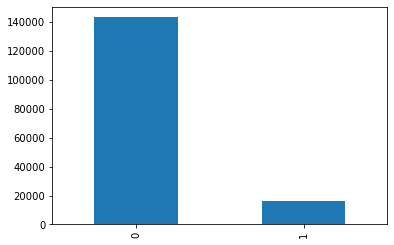

In [11]:
data['toxic'].value_counts().plot(kind='bar')

Как видно из диаграммы, классы не сбалансированны

Чтобы корректно работать с текстом, нам необходимо очистить текст от лишних символов и привести слова к основной форме.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен. Радует, что баланс классов был изучен.
</div>

Разделим исходный файл на обучающу и тестовую выборки

In [12]:
target = data['toxic']
features = data['text']

In [13]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=.5, shuffle=False)

Приведем данные к нужному типу

In [14]:
corpus_train = features_train.values.astype('U')
corpus_test = features_test.values.astype('U')

<div class="alert alert-block alert-info">
<b>Совет: </b> Приводить тексты к юникоду не имеет смысла, так как они все на английском.
</div>

Оставим в датасете только регулярные выражения. Воспользуемся методом re.sub(), применим его ко всему датасету.

In [15]:
def clear_text(text):
    text_lem = re.sub(r'[^a-zA-Z]', ' ', text)
    return text_lem

In [16]:
for i in range(len(corpus_train)):
    corpus_train[i] = clear_text(corpus_train[i])

In [17]:
for i in range(len(corpus_test)):
    corpus_test[i] = clear_text(corpus_test[i])

<div class="alert alert-block alert-success">
<b>Успех:</b> Очистка была сделана верно.
</div>

С помощью стемминга приведем слова к форме основы. Воспользуемся инструментом EnglishStemmer из библиотеки nltk. Применим ко всему датасету.

In [18]:
stemmer = EnglishStemmer(ignore_stopwords=False)

In [19]:
%%time
for i in range(len(corpus_train)):
    word_list = nltk.word_tokenize(corpus_train[i])
    corpus_train[i] = ' '.join([stemmer.stem(w) for w in word_list])

CPU times: user 50.9 s, sys: 0 ns, total: 50.9 s
Wall time: 50.9 s


In [20]:
%%time
for i in range(len(corpus_test)):
    word_list = nltk.word_tokenize(corpus_test[i])
    corpus_test[i] = ' '.join([stemmer.stem(w) for w in word_list])

CPU times: user 51.9 s, sys: 0 ns, total: 51.9 s
Wall time: 51.9 s


Загрузим базу стоп-слов.

In [21]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Векторизуем данные с учетом стоп-слов. Применим метод fit к обычающей выборке, а затем метод transform к обучающему и тестовому набору данных.

In [22]:
count_tf_idf = TfidfVectorizer(stop_words=stopwords)
tf_idf = count_tf_idf.fit(corpus_train)
train_x = tf_idf.transform(corpus_train)
test_x = tf_idf.transform(corpus_test)

In [23]:
print('Размер обучающей выборки', train_x.shape, target_train.shape)
print('Размер тестовой выборки', test_x.shape, target_test.shape)

Размер обучающей выборки (79785, 86919) (79785,)
Размер тестовой выборки (79786, 86919) (79786,)


В ходе работы над этим пунктом мы получили две матрицы, готовые к обучению

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что векторизатор был обучен только на тренировочной части данных.
</div>

## Обучение

Рассмотрим модели машинного обучения такие как: LogisticRegression, RandomForestClassifier, LGBMClassifier и CatBoostClassifier. Искомая метрика для определения лучшей модели - f1.

Запишем функцию для расчета метрики f1

In [24]:
def model_f1(model, X_test, y_test):
      
    y_pred = pd.Series(model.predict(X_test))
    
    return f1_score(y_pred, y_test).round(2)

In [25]:
result = []

Начнем с LogisticRegression

In [26]:
lr = LogisticRegression(random_state=12345, solver = 'liblinear', class_weight='balanced')
lr.fit(train_x, target_train)

LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

In [27]:
result.append(model_f1(lr, test_x, target_test))

Хоть мы и добились желаемого результата, но можно постратаься улучшить метрику более сложными моделями машинного обучения

Рассмотрим следующим классификатор RandomForestClassifier

In [28]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=12345)

In [29]:
rf = RandomForestClassifier(class_weight = 'balanced')

In [30]:
parametrs = { 'n_estimators': range (50, 200, 50),
              'max_depth': range (1,25, 5),
}

In [31]:
grid = GridSearchCV(rf, 
                    parametrs, 
                    cv=cv,
                    verbose=True)

<div class="alert alert-block alert-info">
<b>Совет: </b> Напомню, что внутри кросс-валидации происходит разбиение выборки на треин и валидацию. Однако, в таком случае векторизатор обучен на всей выборке, а это не совсем корректно. Для избежания такого эффекта можно использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">пайплайн</a>. <a href="https://medium.com/analytics-vidhya/ml-pipelines-using-scikit-learn-and-gridsearchcv-fe605a7f9e05">Тут</a> есть пример.
</div>

In [32]:
%%time
grid.fit(train_x, target_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
CPU times: user 6min 12s, sys: 820 ms, total: 6min 13s
Wall time: 6min 13s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=12345, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': range(1, 25, 5),
                         'n_estimators': range(50, 200, 50)},
             verbose=True)

In [33]:
result.append(model_f1(grid.best_estimator_, test_x, target_test))

LGBMClassifier

In [34]:
lgbm = LGBMClassifier(boosting_type='gbdt',class_weight='balanced', verbose=0)

In [35]:
parametrs = {
    'learning_rate': np.logspace(-3, 0, 5),
    'n_estimators': [100, 150],
    'num_leaves': [21, 31, 41],
}

In [36]:
grid = GridSearchCV(lgbm, 
                    parametrs, 
                    cv=cv,
                    verbose=True)

In [37]:
%%time
grid.fit(train_x, target_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.799733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.641101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.637675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.639752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.612459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.641748 seconds.
You can

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=12345, shuffle=True),
             estimator=LGBMClassifier(class_weight='balanced', verbose=0),
             param_grid={'learning_rate': array([0.001     , 0.00562341, 0.03162278, 0.17782794, 1.        ]),
                         'n_estimators': [100, 150],
                         'num_leaves': [21, 31, 41]},
             verbose=True)

In [38]:
result.append(model_f1(grid.best_estimator_, test_x, target_test))

CatBoostClassifier  

In [62]:
cb = CatBoostClassifier(task_type='GPU',
                        eval_metric='TotalF1', 
                        od_type='Iter', 
                        od_wait=500)

In [58]:
parametrs = {
    'learning_rate': np.logspace(-3, 0, 5),
    'iterations': [50, 100],
    'depth': [6, 8, 10],
}

In [59]:
grid = GridSearchCV(cb,
                    parametrs,
                    cv=cv,
                    verbose=False)

In [ ]:
%%time
grid.fit(train_x, target_train)

In [ ]:
result.append(model_f1(grid.best_estimator_, test_x, target_test))

К сожалению, мой компьютер не справился с расчетами и я сделала их на Google Colab  
https://colab.research.google.com/drive/1WGBxR11BqJFiWZktlFJMJMaOTOf1e-p1#scrollTo=-VsARCTW4Y-1  
Лучшие параметры модели: {'depth': 6, 'iterations': 100, 'learning_rate': 1.0}  
f1 на тесте = 0.74

In [41]:
result.append('0.74')

Сведем результаты в одну таблицу для наглядности и определим победителя

In [42]:
f1_result = pd.DataFrame(data=result,
             index=['LogisticRegression', 'RandomForestClassifier', 'LGBMClassifier', 'CatBoostClassifier'],
             columns=['f1_score'])


In [43]:
display(f1_result)

,f1_score
LogisticRegression,0.75
RandomForestClassifier,0.4
LGBMClassifier,0.74
CatBoostClassifier,0.74


Однозначным лидером для решения данной задачи является LogisticRegression.

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что попробовал разные модели в этом шаге!
</div>

## Выводы

В проекте были рассмотрены 4 модели машинного обучения и лучшей оказалась самая простая модель LogisticRegression.  
На практике анализ текста оказался сложнее, чем можно себе представить. Мощности рабочего компьютера может не хватать для развертывания более сложных моделей машинного обучения. Тут не маловажную часть занимает время отработки кода. Логистическая регрессия показала себя прекрасно по скорости обучения (доли секунд), но искомая метрика равная 0.75 не является пределом совершенства. К тому же классы в значительной степени не сбалансированы в таргете.  
В будущем, постараюсь разобраться со специализированными моделями ML, которые помогут делать более качественный прогноз классификации текста

<div class="alert alert-block alert-info">
<b>Совет: </b> Финальный вывод желательно было сделать подробнее.
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны